No handles with labels found to put in legend.


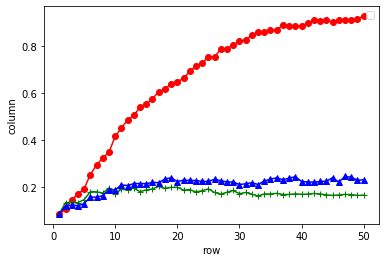

0.2531645569620253	0.10526315789473682	0.1935483870967742	0.29571984435797666	0.460952380952381	0.2531645569620253	0.1527777777777778	0.2449415231433853	0.3208673009752945


In [13]:
all_result = []
seed_list = [42]# [0,1,2,41,42,123, 234, 345, 456, 567]
for seed in seed_list:
    file_name = 'concat_Mood_transition_3_'+str(seed) + '.csv'
    # file_name = ''+str(seed) + '.csv'
    import pandas as pd

    choice = 'macro'
    # choice = 'weighted'

    df = pd.read_csv(file_name)
    df_plot = df[df['train_label'] == choice + ' avg']


    get_ipython().run_line_magic('matplotlib', 'inline')
    import numpy as np
    import matplotlib.pyplot as plt  

    num_epoch = 50
    x = range(1, num_epoch + 1)

    plt.plot(x,df_plot['train_f1-score'],'ro-',x,df_plot['valid_f1-score'],'g+-',x,df_plot['test_f1-score'],'b^-')

    plt.xlabel('row')
    plt.ylabel('column')
    plt.legend()
    plt.show()


    end = df_plot['test_f1-score'].idxmax()
    start = end - 8

    if choice == 'weighted':
        pass
    else:
        start += 1
        end += 1
    print('\t'.join([str(i) for i in df['test_f1-score'][start:end+1]]))
    all_result.append(list(df['test_f1-score'][start:end+1]))


In [14]:
all_result = np.array(all_result)
print(all_result.mean(axis=0))
print(all_result.std(axis=0))

a = np.around(all_result.mean(axis=0),3)
b = np.around(all_result.std(axis=0),3)
for i in range(len(all_result.mean(axis=0))):
    print(str(a[i]) + '$\pm$' + str(b[i]) + ' & ')
np.set_printoptions(precision=3)

[0.253 0.105 0.194 0.296 0.461 0.253 0.153 0.245 0.321]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.253$\pm$0.0 & 
0.105$\pm$0.0 & 
0.194$\pm$0.0 & 
0.296$\pm$0.0 & 
0.461$\pm$0.0 & 
0.253$\pm$0.0 & 
0.153$\pm$0.0 & 
0.245$\pm$0.0 & 
0.321$\pm$0.0 & 
